## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


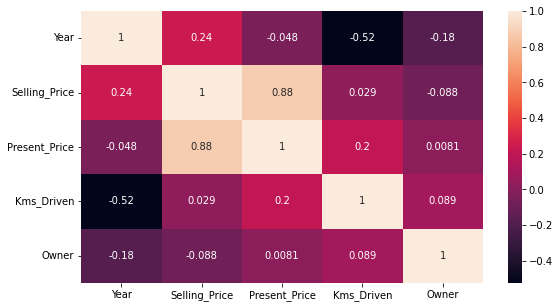

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df["vehicle_age"]=2022-df.Year

In [10]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [11]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

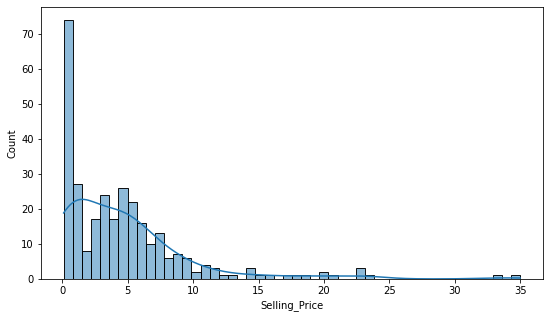

In [13]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

<AxesSubplot:xlabel='Selling_Price'>

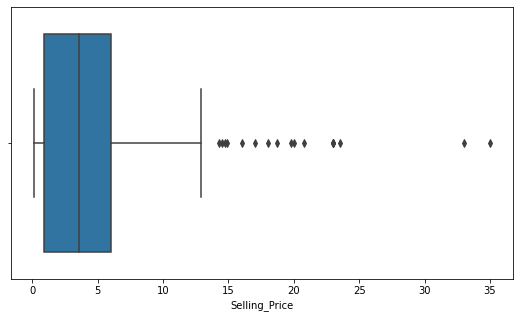

In [14]:
sns.boxplot(df.Selling_Price)

## Train test split

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
df_new = df[df.Selling_Price < 10]
df_new.sample(10)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.590,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.540,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.850,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.150,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.870,42450,Diesel,Dealer,Manual,0,8
5,9.25,9.830,2071,Diesel,Dealer,Manual,0,4
6,6.75,8.120,18796,Petrol,Dealer,Manual,0,7
7,6.50,8.610,33429,Diesel,Dealer,Manual,0,7
8,8.75,8.890,20273,Diesel,Dealer,Manual,0,6
9,7.45,8.920,42367,Diesel,Dealer,Manual,0,7


In [17]:
X=df_new.drop("Selling_Price", axis=1)
y=df_new.Selling_Price

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (218, 7)
Train target shape   :  (218,)
Test features shape  :  (55, 7)
Test target shape    :  (55,)


## Modeling with Pipeline for Adaboost Regressor

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [21]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

#base_estimator=DecisionTreeRegressor(max_depth=3)
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model', AdaBoostRegressor(random_state=101))])

In [24]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.956000,0.957621
mae,0.425779,0.437001
mse,0.303520,0.346972
rmse,0.550927,0.589043


In [25]:
y_pred_ada = pipe_model.predict(X_test)
y_pred_ada

array([5.77972222, 5.54807692, 6.65247934, 7.22843137, 0.65454545,
       4.32162162, 4.715     , 6.65247934, 0.605     , 4.8297619 ,
       0.632     , 0.605     , 4.55238095, 0.588     , 1.20714286,
       3.48125   , 0.588     , 4.8297619 , 8.07236842, 1.2       ,
       0.605     , 0.632     , 8.22058824, 1.1625    , 1.16      ,
       1.20714286, 0.605     , 5.27323529, 0.605     , 5.77      ,
       0.605     , 5.27323529, 5.40448718, 7.81585366, 8.07236842,
       7.99830508, 1.20714286, 3.96079208, 0.588     , 3.01388889,
       4.6380303 , 1.2       , 5.54807692, 2.84615385, 5.54807692,
       0.605     , 0.65454545, 3.62688312, 2.9       , 4.55238095,
       6.87315385, 0.65454545, 0.605     , 7.18285714, 3.00222222])

In [26]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.911136
test_neg_mean_absolute_error       -0.532090
test_neg_mean_squared_error        -0.580550
test_neg_root_mean_squared_error   -0.745942
dtype: float64

In [27]:
from sklearn.tree import plot_tree

In [28]:
features = list(X.select_dtypes("object").columns) + list(X.select_dtypes("number").columns) 
features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

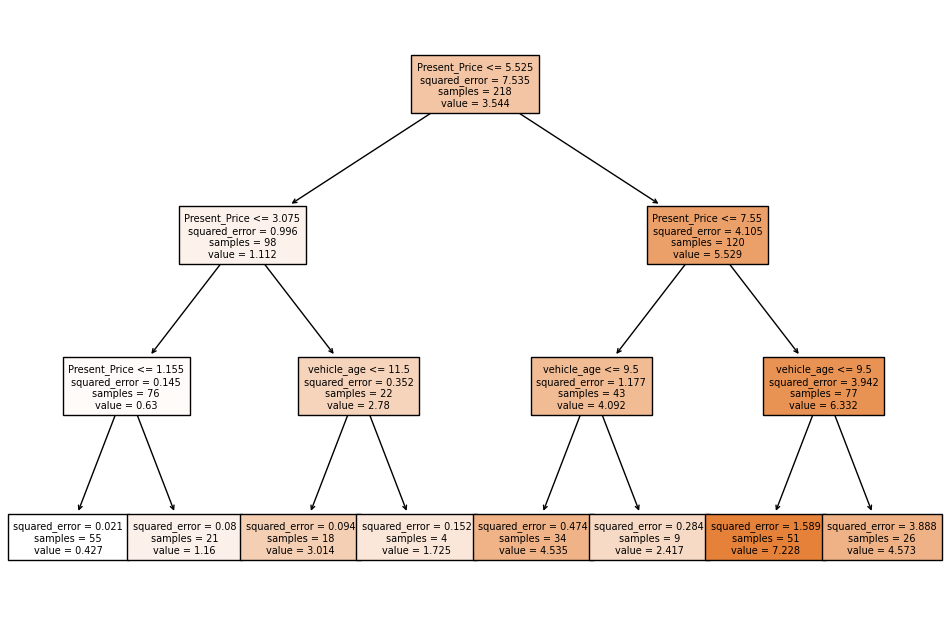

In [29]:
Ada_model = AdaBoostRegressor(n_estimators=3, random_state=101)

operations = [("OrdinalEncoder", column_trans), ("Ada_model", Ada_model)]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(12,8),dpi=100)
plot_tree(model["Ada_model"].estimators_[0], filled=True, feature_names=features, fontsize=7);

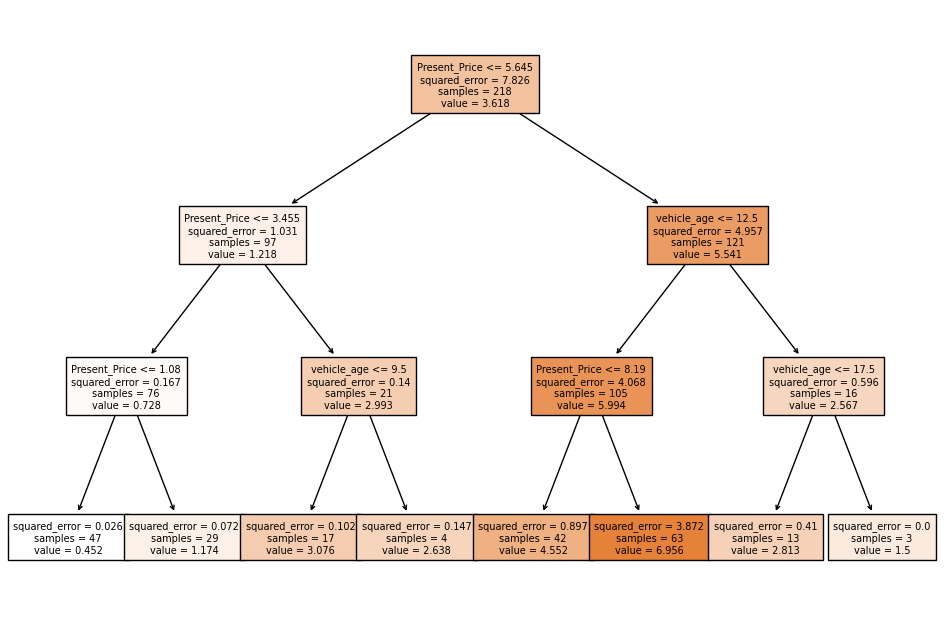

In [30]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model["Ada_model"].estimators_[1], filled=True, feature_names=features, fontsize=7);

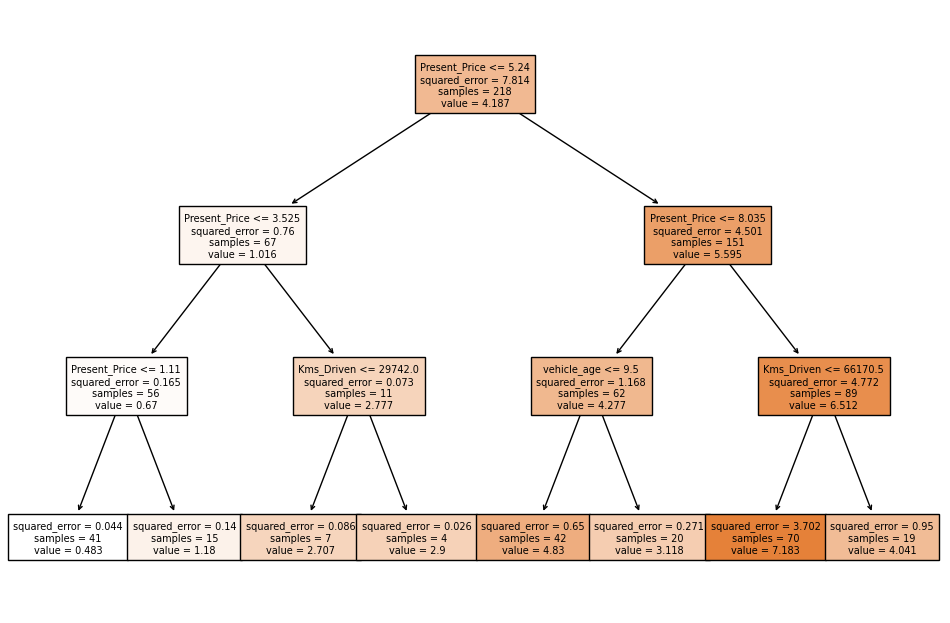

In [31]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model["Ada_model"].estimators_[2], filled=True, feature_names=features, fontsize=7);

In [32]:
y_pred

array([7.18285714, 4.8297619 , 7.18285714, 7.18285714, 0.45191489,
       4.55238095, 4.55238095, 7.18285714, 0.45191489, 4.55238095,
       0.45191489, 0.45191489, 4.55238095, 0.45191489, 1.17448276,
       3.01388889, 0.45191489, 4.55238095, 7.18285714, 1.17448276,
       0.45191489, 0.45191489, 7.18285714, 1.17448276, 1.17448276,
       1.17448276, 0.45191489, 7.18285714, 0.45191489, 4.8297619 ,
       0.45191489, 7.18285714, 4.8297619 , 7.18285714, 7.18285714,
       7.18285714, 1.17448276, 3.1175    , 0.45191489, 3.01388889,
       4.55238095, 1.17448276, 4.8297619 , 3.1175    , 4.8297619 ,
       0.45191489, 0.45191489, 4.04105263, 2.9       , 4.55238095,
       7.18285714, 0.45191489, 0.45191489, 7.18285714, 2.9       ])

In [33]:
np.array(y_test)

array([6.  , 6.1 , 7.9 , 9.5 , 0.5 , 4.5 , 4.95, 6.95, 0.2 , 5.25, 0.25,
       0.75, 5.4 , 0.35, 1.75, 2.75, 0.6 , 5.5 , 6.7 , 1.2 , 0.75, 0.65,
       8.35, 0.65, 0.6 , 1.2 , 0.2 , 5.25, 0.4 , 5.25, 0.4 , 5.  , 4.5 ,
       7.5 , 8.99, 8.4 , 1.1 , 3.1 , 0.18, 2.55, 4.6 , 1.15, 4.75, 2.25,
       5.8 , 0.45, 0.5 , 3.  , 2.55, 4.5 , 7.45, 0.1 , 0.3 , 7.75, 2.35])

In [34]:
 #X_test

In [35]:
X_test.loc[[33]]

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
33,9.95,45000,Diesel,Dealer,Manual,0,8


In [36]:
pipe_model["OrdinalEncoder"].fit_transform(X_test.loc[[33]])

array([[0.00e+00, 0.00e+00, 0.00e+00, 9.95e+00, 4.50e+04, 0.00e+00,
        8.00e+00]])

## Gridsearch for Adaboosting

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {"Ada_model__n_estimators":[50, 100, 200, 300, 500],
              "Ada_model__learning_rate":[0.1, 0.5, 0.8, 1],
              "Ada_model__loss": ["linear", "square"]
            }

In [39]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [40]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('Ada_model',
                                        AdaBoostRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'Ada_model__learning_rate': [0.1, 0.5, 0.8, 1],
                         'Ada_model__loss': ['linear', 'square'],
                         'Ada_model__n_estimators': [50, 100, 200, 300, 500]

In [41]:
grid_model.best_params_

{'Ada_model__learning_rate': 1,
 'Ada_model__loss': 'square',
 'Ada_model__n_estimators': 50}

In [42]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(learning_rate=1, loss='square',
                                   random_state=101))])

In [43]:
grid_model.best_score_

-0.710305517392291

In [44]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.955490,0.954670
mae,0.406639,0.470332
mse,0.307040,0.371128
rmse,0.554112,0.609203


## Feature importance

In [45]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(loss='square', random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(loss='square', random_state=101))])

In [46]:
pipe_model["Ada_model"].feature_importances_

array([0.09376112, 0.08093155, 0.00073958, 0.48687039, 0.07918805,
       0.0007714 , 0.25773791])

In [47]:
imp_feats = pd.DataFrame(data=pipe_model["Ada_model"].feature_importances_,columns=['ada_Importance'], index=features)
ada_imp_feats = imp_feats.sort_values('ada_Importance', ascending=False)
ada_imp_feats

,ada_Importance
Present_Price,0.486870
vehicle_age,0.257738
Fuel_Type,0.093761
Seller_Type,0.080932
Kms_Driven,0.079188
Owner,0.000771
Transmission,0.000740


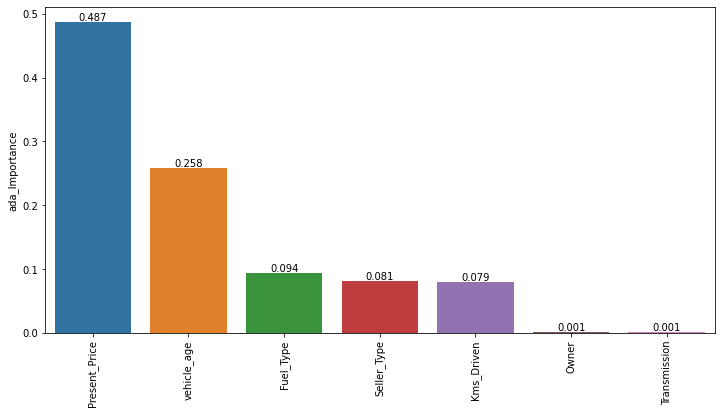

In [48]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for Gradient Boosting Regressor

In [49]:
from sklearn.ensemble import GradientBoostingRegressor

operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model', GradientBoostingRegressor(random_state=101))])

In [50]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 * (-50) + 0.1*(-30)

# 200 -- 150 -- (50) -- (25)  --> 150 + 0.1 * 50 + 0.1*25

In [51]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.991287,0.966749
mae,0.171650,0.364139
mse,0.060105,0.272235
rmse,0.245162,0.521761


In [52]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.934069
test_neg_mean_absolute_error       -0.447367
test_neg_mean_squared_error        -0.423153
test_neg_root_mean_squared_error   -0.629813
dtype: float64

## Gridsearch for Gradientboosting

In [53]:
param_grid = {"GB_model__n_estimators":[64, 128], 
              "GB_model__subsample":[0.5, 0.8], 
              "GB_model__max_features" : [3, 5, 6],
              "GB_model__learning_rate": [0.1, 0.2], 
              'GB_model__max_depth':[1,2]}

In [54]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [55]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('GB_model',
                                        GradientBoostingRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'GB_model__learning_rate': [0.1, 0.2],
                         'GB_model__max_depth': [1, 2],
                         'GB_model__max_features': [3, 5, 6],
                         '

In [56]:
grid_model.best_params_

{'GB_model__learning_rate': 0.1,
 'GB_model__max_depth': 2,
 'GB_model__max_features': 6,
 'GB_model__n_estimators': 128,
 'GB_model__subsample': 0.5}

In [57]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingRegressor(max_depth=2, max_features=6,
                                           n_estimators=128, random_state=101,
                                           subsample=0.5))])

In [58]:
grid_model.best_score_

-0.6147539238853272

In [59]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.982318,0.971883
mae,0.258413,0.343843
mse,0.121976,0.230201
rmse,0.349251,0.479793


In [60]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(max_depth=2, max_features=6,
                                           n_estimators=128, random_state=101, subsample=0.5))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.942327
test_neg_mean_absolute_error       -0.437196
test_neg_mean_squared_error        -0.363090
test_neg_root_mean_squared_error   -0.590610
dtype: float64

## Feature importance

In [61]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(max_depth=2, max_features=6,
                                           n_estimators=128, random_state=101, subsample=0.5))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingRegressor(max_depth=2, max_features=6,
                                           n_estimators=128, random_state=101,
                                           subsample=0.5))])

In [62]:
pipe_model["GB_model"].feature_importances_

array([0.01649209, 0.30586201, 0.00123971, 0.5047089 , 0.05078392,
       0.        , 0.12091337])

In [63]:
imp_feats = pd.DataFrame(data=pipe_model["GB_model"].feature_importances_,columns=['grad_Importance'], index=features)
grad_imp_feats = imp_feats.sort_values('grad_Importance', ascending=False)
grad_imp_feats

,grad_Importance
Present_Price,0.504709
Seller_Type,0.305862
vehicle_age,0.120913
Kms_Driven,0.050784
Fuel_Type,0.016492
Transmission,0.001240
Owner,0.000000


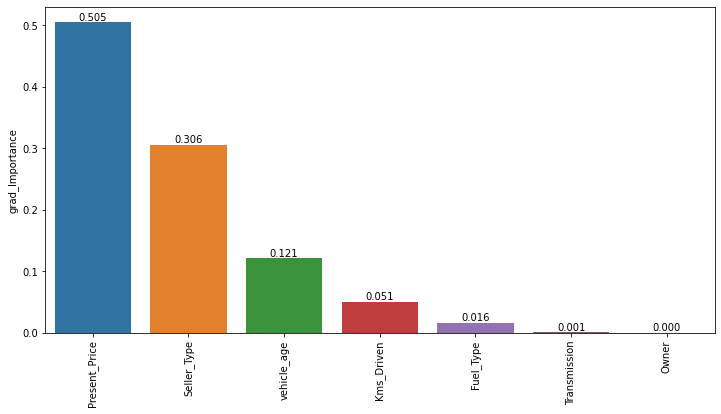

In [64]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for XG Boost Regressor

In [65]:
#!pip install --upgrade pip

In [66]:
#!pip install xgboost==0.90

In [67]:
import xgboost as xgb

xgb.__version__

'0.90'

In [68]:
from xgboost import XGBRegressor

operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, 
                                                                           objective="reg:squarederror"))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(objective='reg:squarederror', random_state=101))])

In [69]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.988654,0.971464
mae,0.200848,0.325477
mse,0.078267,0.233633
rmse,0.279762,0.483356


In [70]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, 
                                                                           objective="reg:squarederror"))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.932878
test_neg_mean_absolute_error       -0.441457
test_neg_mean_squared_error        -0.428459
test_neg_root_mean_squared_error   -0.629648
dtype: float64

## Gridsearch for XGBoost

In [71]:
param_grid = {"XGB_model__n_estimators":[100, 300],
              "XGB_model__max_depth":[1, 2], 
              "XGB_model__learning_rate": [0.01, 0.05, 0.1],
              "XGB_model__subsample":[0.5, 1], 
              "XGB_model__colsample_bytree":[0.5, 1]}

In [72]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101, 
                                                                           objective="reg:squarederror"))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [73]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBRegressor(objective='reg:squarederror',
                                                     random_state=101))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.5, 1],
                         'XGB_model__learning_rate': [0.01, 0.05, 0.1],

In [74]:
grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 300,
 'XGB_model__subsample': 0.5}

In [75]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=300,
                              objective='reg:squarederror', random_state=101,
                              subsample=0.5))])

In [76]:
grid_model.best_score_

-0.5917684267930549

In [77]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.982565,0.973915
mae,0.259637,0.340425
mse,0.120267,0.213568
rmse,0.346795,0.462134


## Feature importance

In [78]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(learning_rate=0.05, max_depth=2,
                              n_estimators=300, objective='reg:squarederror', random_state=101,subsample=0.5))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=300,
                              objective='reg:squarederror', random_state=101,
                              subsample=0.5))])

In [79]:
pipe_model["XGB_model"].feature_importances_

array([0.04713321, 0.22340359, 0.01236718, 0.45901182, 0.04935779,
       0.        , 0.20872636], dtype=float32)

In [80]:
imp_feats = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_, columns=['xgb_Importance'], index=features)
xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
Present_Price,0.459012
Seller_Type,0.223404
vehicle_age,0.208726
Kms_Driven,0.049358
Fuel_Type,0.047133
Transmission,0.012367
Owner,0.000000


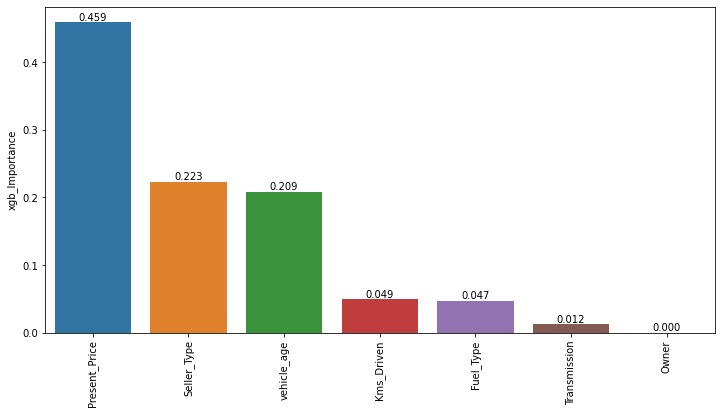

In [81]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [82]:
pd.concat([xgb_imp_feats, ada_imp_feats, grad_imp_feats], axis=1)

,xgb_Importance,ada_Importance,grad_Importance
Present_Price,0.459012,0.486870,0.504709
Seller_Type,0.223404,0.080932,0.305862
vehicle_age,0.208726,0.257738,0.120913
Kms_Driven,0.049358,0.079188,0.050784
Fuel_Type,0.047133,0.093761,0.016492
Transmission,0.012367,0.000740,0.001240
Owner,0.000000,0.000771,0.000000


## Feature Selection

In [85]:
X_new = df_new[["vehicle_age",  "Present_Price", "Seller_Type"]]
X_new.head()

,vehicle_age,Present_Price,Seller_Type
0,8,5.59,Dealer
1,9,9.54,Dealer
2,5,9.85,Dealer
3,11,4.15,Dealer
4,8,6.87,Dealer


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=101)

In [91]:
cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')


operations = [("OrdinalEncoder", column_trans), ("XGB_model",XGBRegressor(learning_rate=0.05, max_depth=2,
                              n_estimators=300, objective='reg:squarederror', random_state=101,subsample=0.5))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train,y_train)
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.975074,0.975599
mae,0.302085,0.324903
mse,0.171945,0.199780
rmse,0.414662,0.446967


In [92]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model",XGBRegressor(learning_rate=0.05, max_depth=2,
                              n_estimators=300, objective='reg:squarederror', random_state=101,subsample=0.5))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.937604
test_neg_mean_absolute_error       -0.443074
test_neg_mean_squared_error        -0.399087
test_neg_root_mean_squared_error   -0.607730
dtype: float64

## Final Model

In [114]:
X_new.head()

,vehicle_age,Present_Price,Seller_Type
0,8,5.59,Dealer
1,9,9.54,Dealer
2,5,9.85,Dealer
3,11,4.15,Dealer
4,8,6.87,Dealer


In [115]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

cat2 = ["Seller_Type"]

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat2), remainder='passthrough')


operations = [("OrdinalEncoder", column_trans), ("XGB_model",XGBRegressor(learning_rate=0.05, max_depth=2,
                              n_estimators=300, objective='reg:squarederror', random_state=101,subsample=0.5))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_new, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Seller_Type'])])),
                ('XGB_model',
                 XGBRegressor(learning_rate=0.05, max_depth=2, n_estimators=300,
                              objective='reg:squarederror', random_state=101,
                              subsample=0.5))])

In [116]:
pd.DataFrame(column_trans.fit_transform(X_new)).head()

,0,1,2
0,0.0,8.0,5.59
1,0.0,9.0,9.54
2,0.0,5.0,9.85
3,0.0,11.0,4.15
4,0.0,8.0,6.87


## Prediction

In [126]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [127]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [128]:
pipe_model.predict(df_samples)

array([5.8607016, 5.042182 ], dtype=float32)